In [134]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib

In [135]:
gen_dirs = glob.glob('../runs/*/predict/longterm/*')
print('found {} dirs'.format(len(gen_dirs)))

for i, gen_dir in enumerate(gen_dirs):
    print(i, gen_dir, '\n')

found 1 dirs
0 ../runs/gan_20190430_1720_gpu=7_bs=16_cl=8_lr=0.0001_b1=0.0_b2=0.9_ep=0.1_pl=50.0_lk=0.2_bn=True_vr=0.5_is=6_cs=5_rf=10_rs=5_sw=True_glw=[1_100_500_10_0_0]_clw=[1_1_10]_tag=beefier_decoder_more_summaries_batchnorm/predict/longterm/gen_100 



In [136]:
gen_dir = gen_dirs[0]

img_dirs = glob.glob(os.path.join(glob.escape(gen_dir), '*'))
print('found {} img_dirs'.format(len(img_dirs)), '\n')

for i, img_dir in enumerate(img_dirs):
    print(i, os.path.basename(img_dir))

found 8 img_dirs 

0 ADNI_207832
1 ADNI_245499
2 ADNI_521437
3 ADNI_100687
4 ADNI_573704
5 ADNI_179555
6 ADNI_343575
7 ADNI_271651


In [163]:
img_dir = img_dirs[2]

imgs = glob.glob(os.path.join(glob.escape(img_dir), '*yf*.nii.gz'))
print('found {} images'.format(len(imgs)))

found 30 images


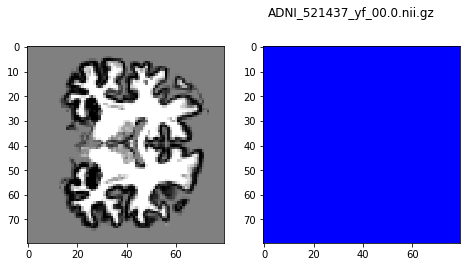

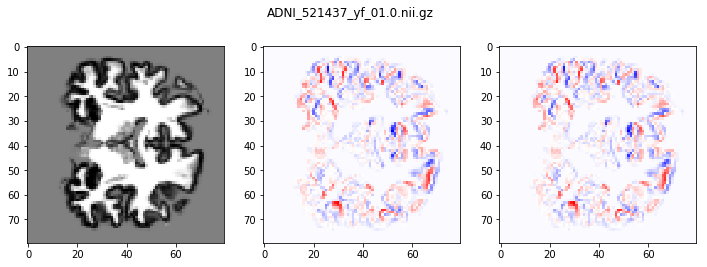

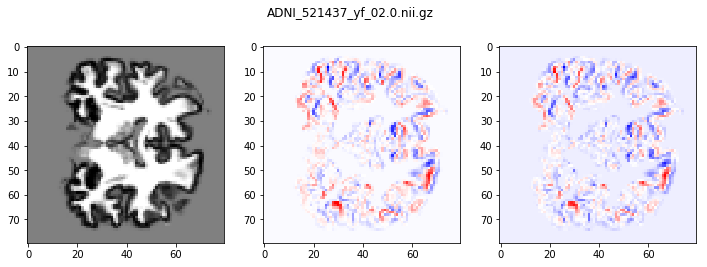

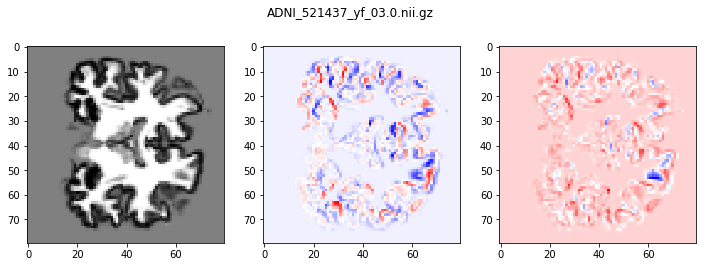

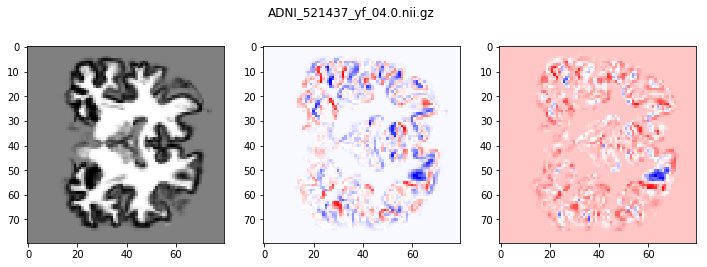

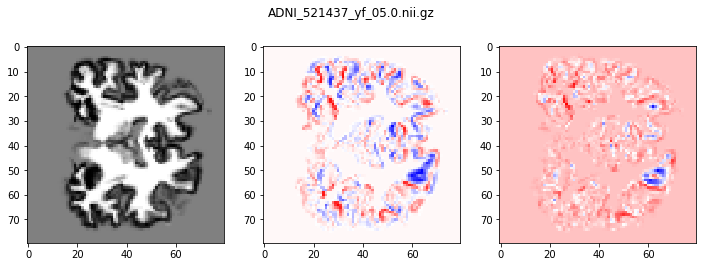

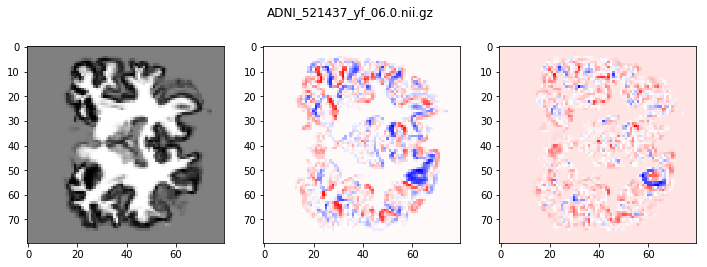

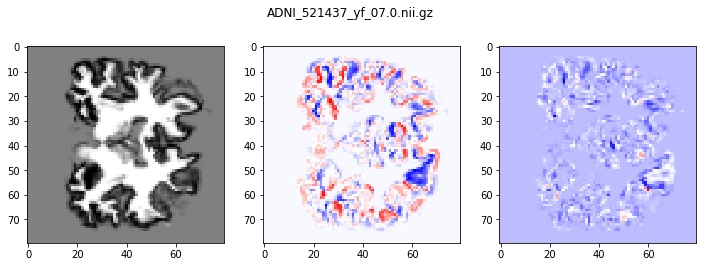

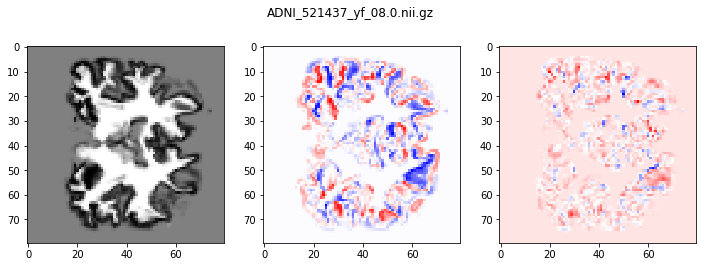

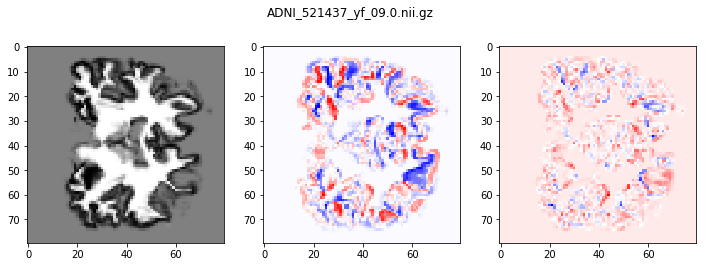

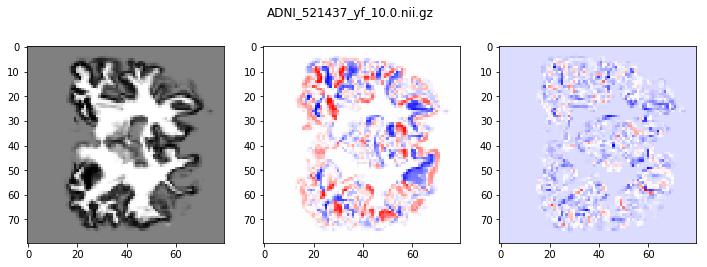

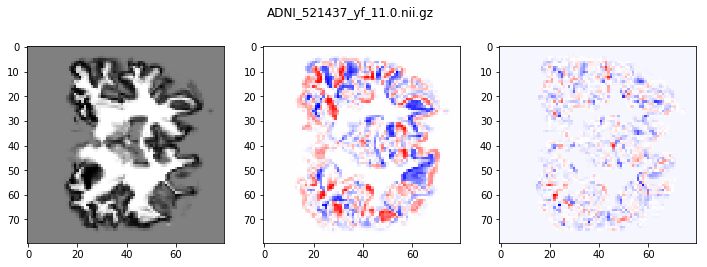

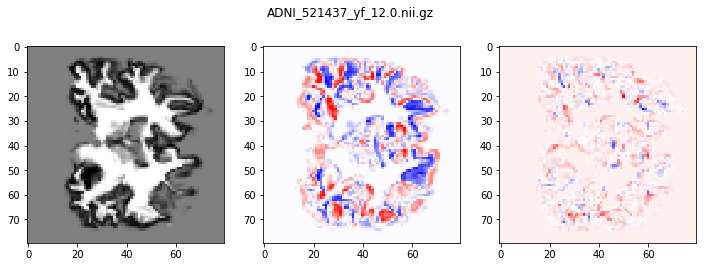

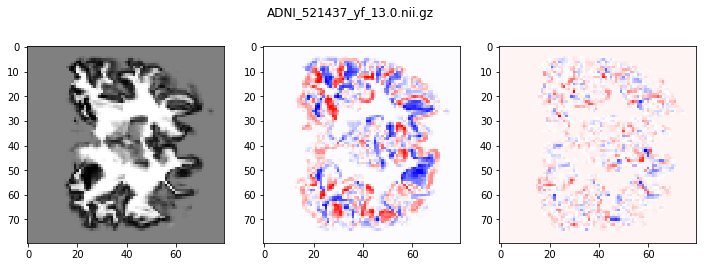

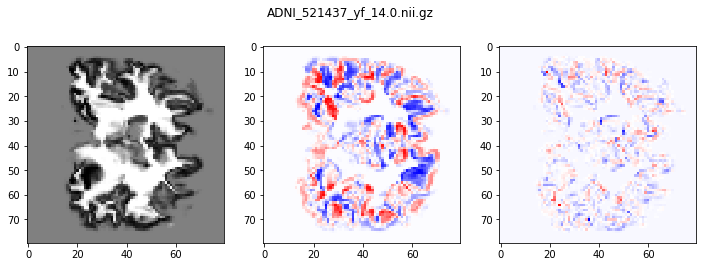

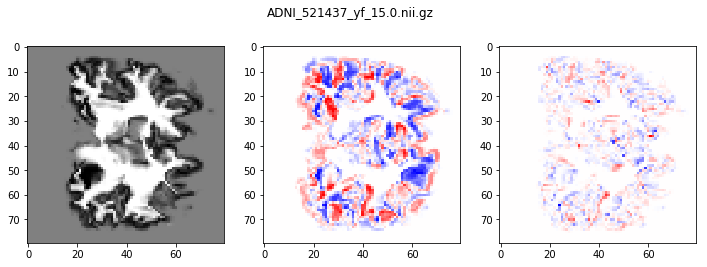

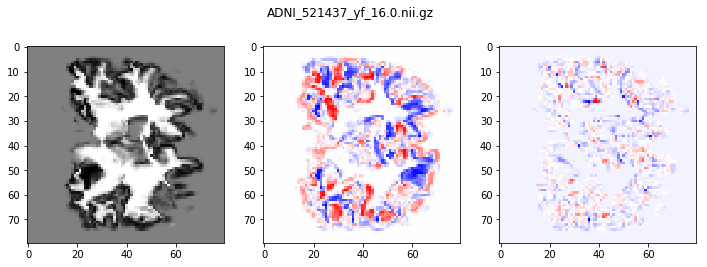

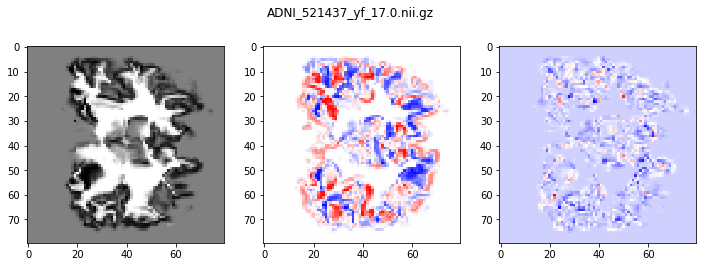

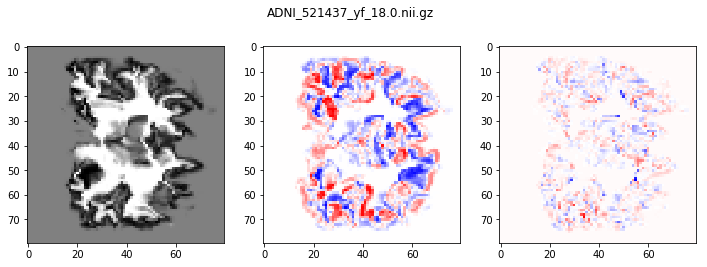

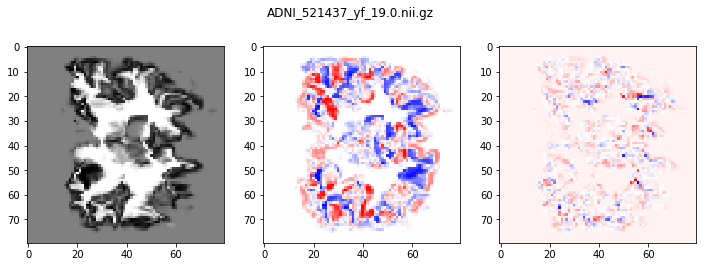

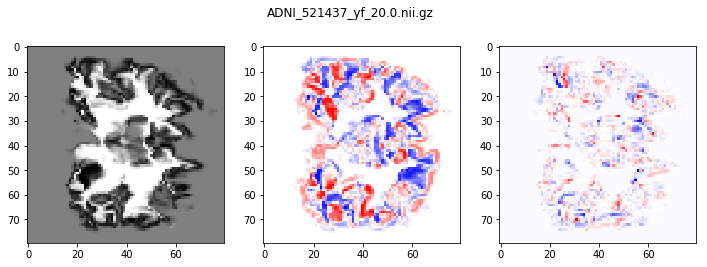

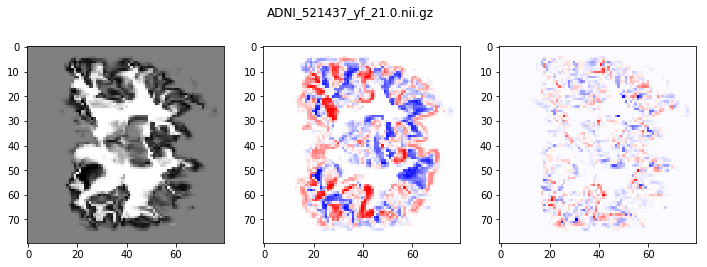

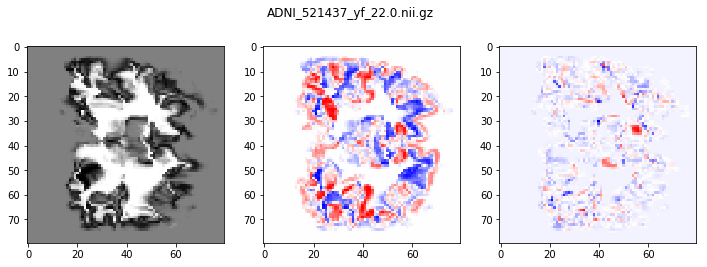

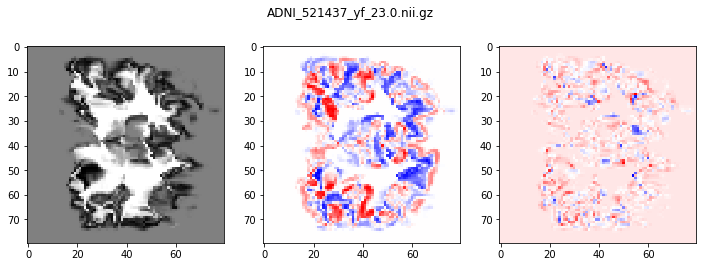

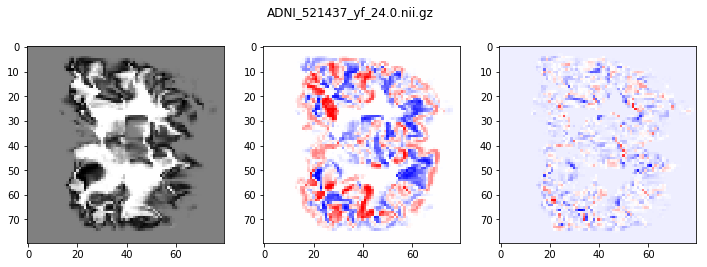

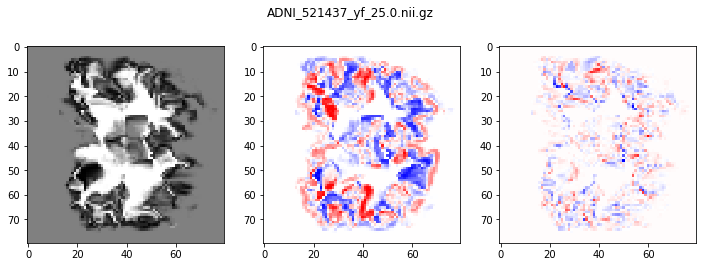

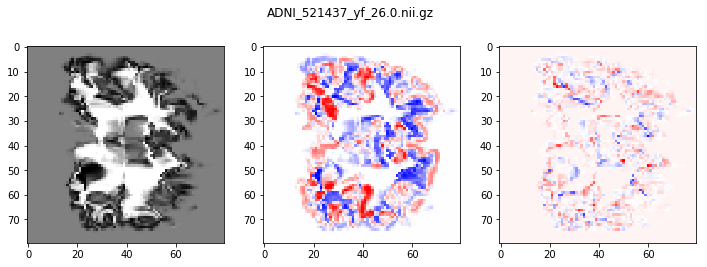

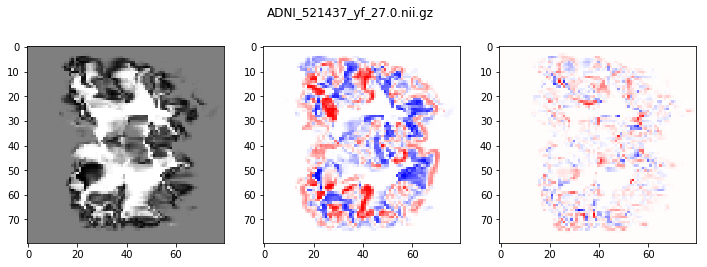

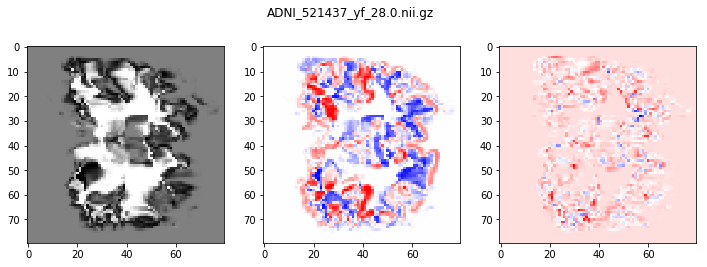

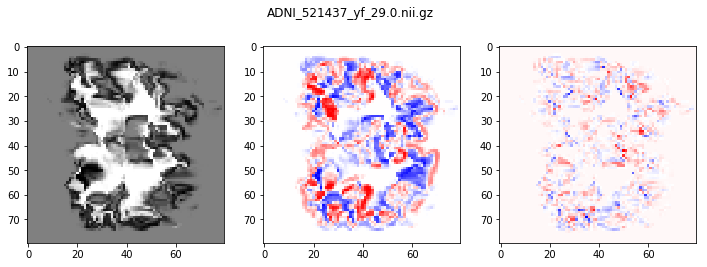

In [164]:
imgs = sorted(imgs)

vols = []

for img in imgs:
    nii = nib.load(img)
    vol = nii.get_data().astype(np.float32)
    vols.append(vol)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.suptitle(os.path.basename(img))
    
    plt.imshow(vol[:, 16, :, 0], cmap='gray')
    plt.subplot(1, 3, 2)
    plt.imshow((vol - vols[0])[:, 16, :, 0], cmap='bwr')
    if len(vols) >= 2:
        plt.subplot(1, 3, 3)
        plt.imshow((vol - vols[-2])[:, 16, :, 0], cmap='bwr')